<a href="https://colab.research.google.com/github/greyhound101/internship/blob/master/densenet_all_layer_145.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Mounted at /content/gdrive


In [2]:
import zipfile
import h5py
from keras.optimizers import *
import cv2
from keras.utils import to_categorical
from matplotlib import pyplot as plt
import glob, os
from matplotlib import pyplot as plt
import h5py
from sklearn.metrics import accuracy_score
import numpy as np
from tqdm import tqdm
import time
import gc
from keras.applications import *
from keras.layers import *
from keras import backend as K
from keras.models import Model
import keras
import pandas as pd
from keras.applications.nasnet import NASNetMobile, preprocess_input
import imgaug as ia
from imgaug import augmenters as iaa

import zipfile
import h5py
from keras.optimizers import Adam
import cv2
from keras.utils import to_categorical
from matplotlib import pyplot as plt
import glob, os
from matplotlib import pyplot as plt
import h5py
from sklearn.metrics import accuracy_score
import numpy as np
from tqdm import tqdm
import time
import gc
from keras.applications import *
from keras.layers import *
from keras import backend as K
from keras.models import Model


Using TensorFlow backend.


In [3]:
path = F"/content/gdrive/My Drive/check.npy" 
df=np.load(path,allow_pickle=True)
df=df.item()

In [4]:

#shuffle samples
def unison_shuffled_copies(items):
    p = np.random.permutation(len(items[0]))
    return [item[p] for item in items]




#change targets
def change(img):
    resized = cv2.resize(img, (299,299), interpolation = cv2.INTER_AREA )
    return resized




#get train and test splits
def get_trn_tst(df,tst_fold):
  dimension=224
  idx=np.asarray(df['fold'])
  y=np.asarray(df['label'])
  y-=1
  img=np.asarray(df['image'])
  img1=[]
  img1=np.asarray(img)
  del([img])
  gc.collect()
  trn_y=np.asarray(y[(idx!=tst_fold)])
  trn_img=np.asarray(img1[(idx!=tst_fold)])
  tst_y=np.asarray(y[(idx==tst_fold)])
  tst_img=img1[idx==tst_fold]
  trn_img=np.repeat(trn_img.reshape((trn_img.shape[0],dimension,dimension,1)),3,axis=3)
  tst_img=np.repeat(tst_img.reshape((tst_img.shape[0],dimension,dimension,1)),3,axis=3)
  return (trn_img.copy(),trn_y.copy()),(tst_img.copy(),tst_y.copy())

In [5]:
import numpy as np
fnl_acc3=list(np.load('final_accuracy_all_fold3_densenet_145.npy',allow_pickle=True).item().values())[0]
fnl_acc5=list(np.load('final_accuracy_all_fold5_densenet_145.npy',allow_pickle=True).item().values())[0]
fnl_acc4=list(np.load('final_accuracy_all_fold4_densenet_145.npy',allow_pickle=True).item().values())[0]
fnl_acc2=list(np.load('final_accuracy_all_fold2_densenet_145.npy',allow_pickle=True).item().values())[0]
fnl_acc1=list(np.load('final_accuracy_all_fold1_densenet_145.npy',allow_pickle=True).item().values())[0]
np.mean([fnl_acc1,fnl_acc2,fnl_acc3,fnl_acc4,fnl_acc5])

0.9611521647800917

In [6]:
fnl_acc3=list(np.load('times_all_fold_3_densenet_145.npy',allow_pickle=True).item().values())[0]
fnl_acc5=list(np.load('times_all_fold_5_densenet_145.npy',allow_pickle=True).item().values())[0]
fnl_acc4=list(np.load('times_all_fold_4_densenet_145.npy',allow_pickle=True).item().values())[0]
fnl_acc2=list(np.load('times_all_fold_2_densenet_145.npy',allow_pickle=True).item().values())[0]
fnl_acc1=list(np.load('times_all_fold_1_densenet_145.npy',allow_pickle=True).item().values())[0]
np.mean([fnl_acc1,fnl_acc2,fnl_acc3,fnl_acc4,fnl_acc5])

20990.204482746125

In [7]:
tot_ans=[]
tot_pre=[]

In [8]:


from sklearn.metrics import confusion_matrix
ans_1=np.load('answers_all_fold_1_densenet_145.npy',allow_pickle=True).item()
fold_1_pre=np.load('predictions_all_fold_1_densenet_145.npy',allow_pickle=True).item()
ans_1=list(ans_1.values())[0]
fold_1_pre=list(fold_1_pre.values())[0]
tot_ans.extend(ans_1)
tot_pre.extend(fold_1_pre)
print(confusion_matrix(ans_1,fold_1_pre))



[[111   1   0]
 [  7 238   0]
 [  8   2 175]]


In [9]:
import gc
ids=np.load('identity_all_fold_1_densenet_145.npy')
_,tst=get_trn_tst(df,1)

(542, 224, 224, 3)


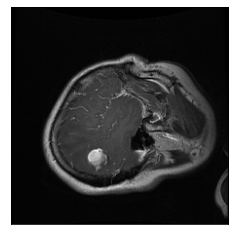

1
0
0


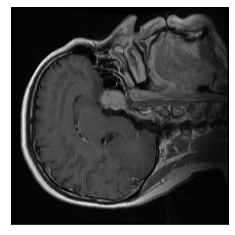

2
0
1


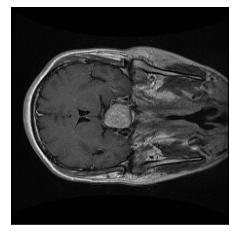

2
0
2


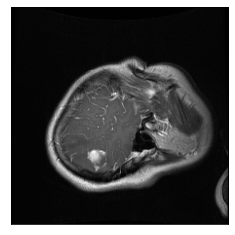

1
0
3


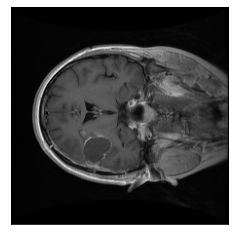

1
0
4


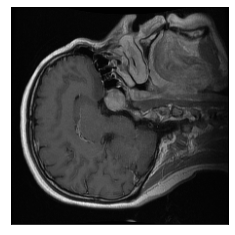

2
0
5


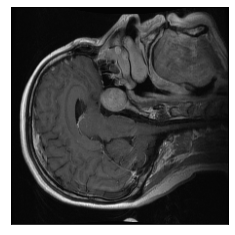

2
0
6


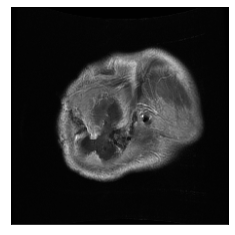

1
0
7


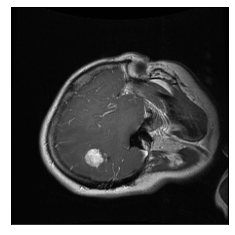

1
0
8


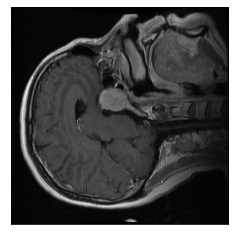

2
0
9


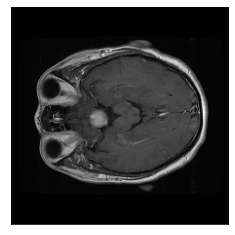

2
0
10


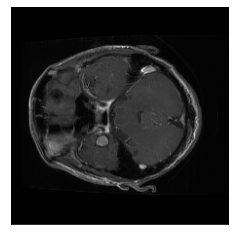

1
0
11


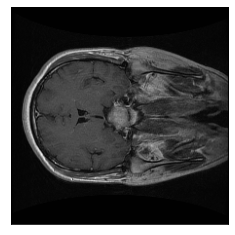

2
1
12


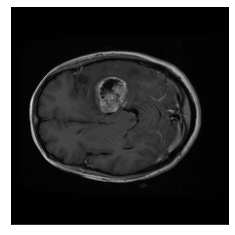

1
0
13


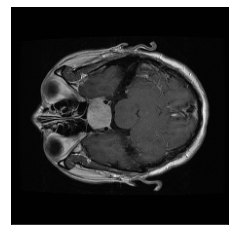

2
0
14


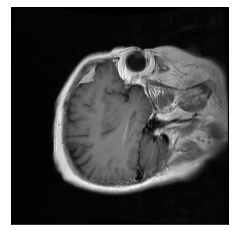

0
1
15


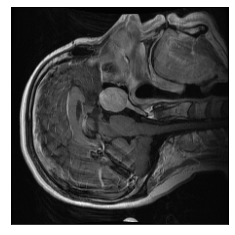

2
0
16


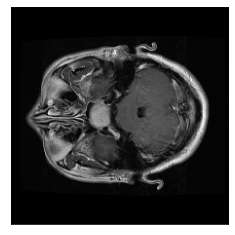

2
1
17


29430

In [10]:

images=tst[0][ids]
labels=tst[1][ids]
print(images.shape)
ans_err=ans_1[labels!=fold_1_pre]
img_err=images[labels!=fold_1_pre]
ids_err=ids[labels!=fold_1_pre]
pred_err=fold_1_pre[labels!=fold_1_pre]
from matplotlib import pyplot as plt
for i in range(len(ids_err)):
  plt.xticks([])
  plt.yticks([])
 
  plt.imshow(img_err[i])
  plt.show()
  print(ans_err[i])
  print(pred_err[i])
  print(i)
del([tst])
gc.collect()

In [11]:
import cv2
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

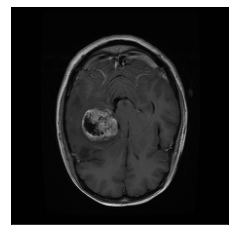

In [12]:
plt.xticks([])
plt.yticks([]) 
plt.imshow(rotate_image(img_err[13],90))
plt.savefig('actually_1_predicted_0.png',pad_inches=0)
plt.show()

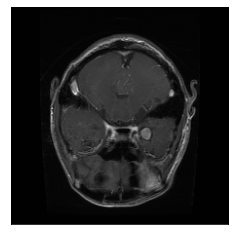

In [13]:
plt.xticks([])
plt.yticks([]) 
plt.imshow(rotate_image(img_err[11],90))
plt.savefig('actually_1_predicted_0_1.png',pad_inches=0)
plt.show()

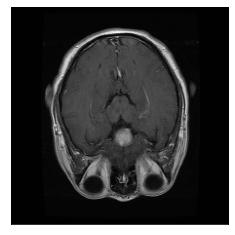

In [14]:
plt.xticks([])
plt.yticks([]) 
plt.imshow(rotate_image(img_err[10],90))
plt.savefig('actually_2_predicted_0.png',pad_inches=0)
plt.show()

In [15]:

ans_1=np.load('answers_all_fold_2_densenet_145.npy',allow_pickle=True).item()
fold_1_pre=np.load('predictions_all_fold_2_densenet_145.npy',allow_pickle=True).item()
ans_1=list(ans_1.values())[0]
fold_1_pre=list(fold_1_pre.values())[0]
tot_ans.extend(ans_1)
tot_pre.extend(fold_1_pre)
print(confusion_matrix(ans_1,fold_1_pre))



[[159   8   0]
 [  3 333   2]
 [  5  12 157]]


(679, 224, 224, 3)


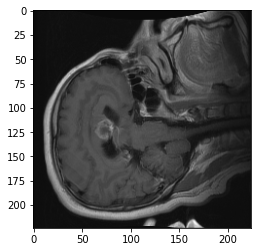

1
2
0


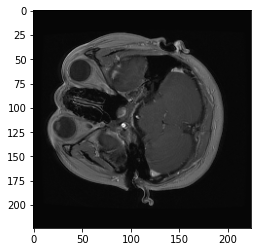

2
1
1


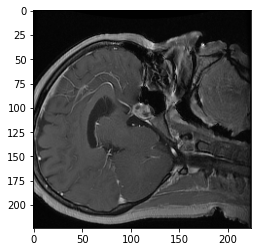

2
1
2


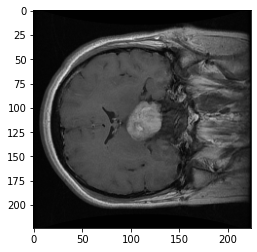

2
0
3


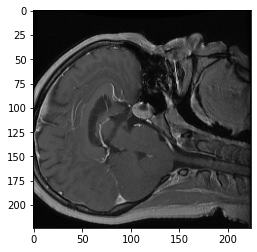

2
1
4


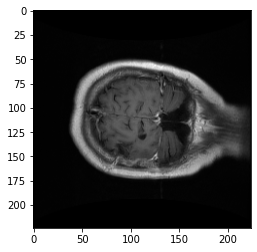

1
0
5


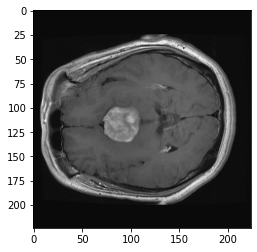

2
0
6


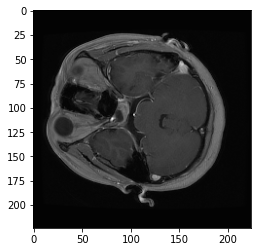

2
1
7


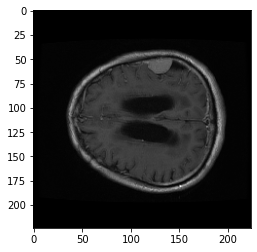

0
1
8


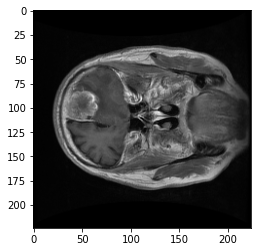

0
1
9


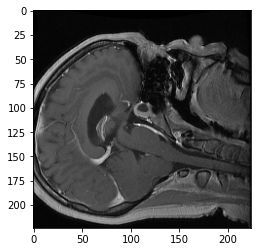

2
1
10


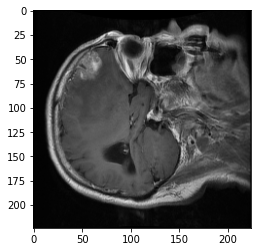

0
1
11


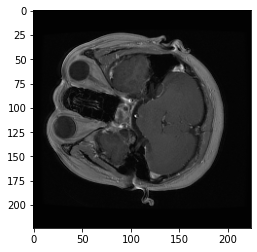

2
1
12


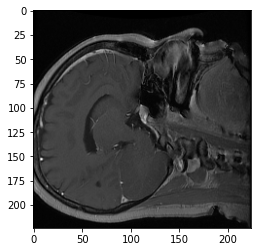

2
1
13


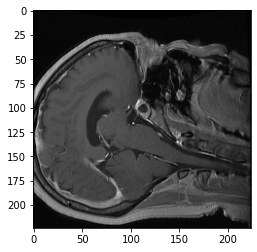

2
1
14


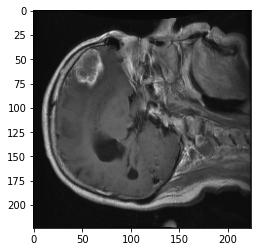

0
1
15


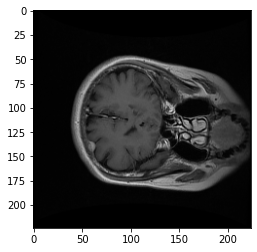

0
1
16


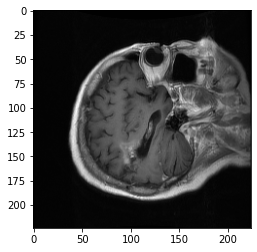

1
0
17


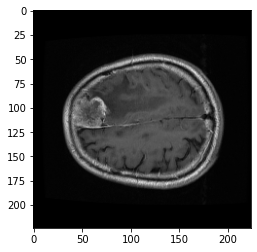

0
1
18


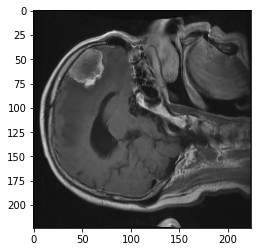

0
1
19


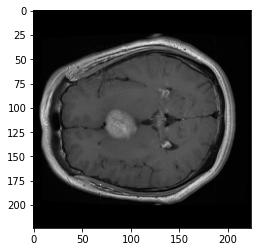

2
0
20


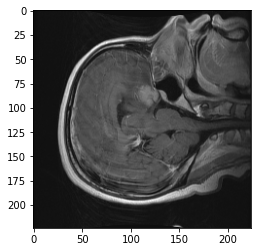

0
1
21


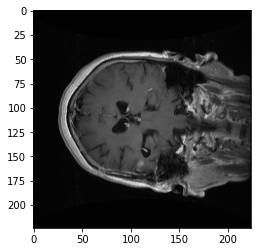

1
0
22


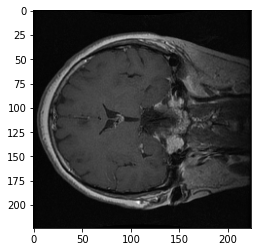

2
0
23


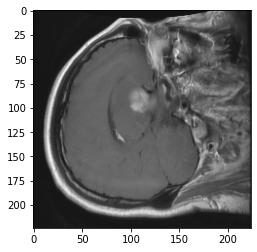

2
0
24


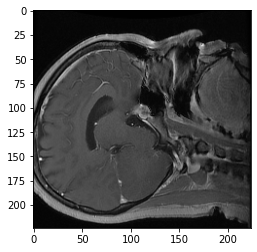

2
1
25


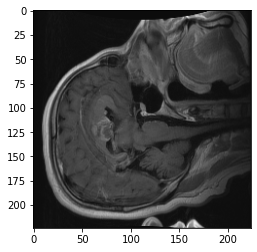

1
2
26


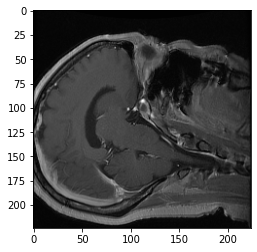

2
1
27


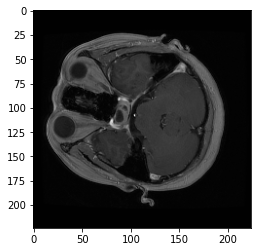

2
1
28


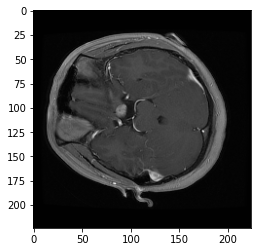

2
1
29


10589

In [16]:
import gc
ids=np.load('identity_all_fold_2_densenet_145.npy')
_,tst=get_trn_tst(df,2)
images=tst[0][ids]
labels=tst[1][ids]
print(images.shape)
ans_err=ans_1[labels!=fold_1_pre]
img_err=images[labels!=fold_1_pre]
ids_err=ids[labels!=fold_1_pre]
pred_err=fold_1_pre[labels!=fold_1_pre]
from matplotlib import pyplot as plt
for i in range(len(ids_err)):
  plt.imshow(img_err[i])
  plt.show()
  print(ans_err[i])
  print(pred_err[i])
  print(i)
del([tst])
gc.collect()

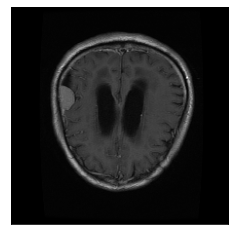

In [17]:
plt.xticks([])
plt.yticks([]) 
plt.imshow(rotate_image(img_err[8],90))
plt.savefig('actually_0_predicted_1.png',pad_inches=0)
plt.show()

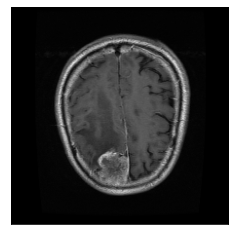

In [18]:
plt.xticks([])
plt.yticks([]) 
plt.imshow(rotate_image(img_err[18],90))
plt.savefig('actually_0_predicted_1_1.png',pad_inches=0)
plt.show()

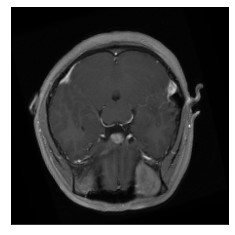

In [28]:
plt.xticks([])
plt.yticks([]) 
plt.imshow(rotate_image(img_err[29],105))
plt.savefig('actually_2_predicted_1.png',pad_inches=0)
plt.show()

In [21]:

ans_1=np.load('answers_all_fold_3_densenet_145.npy',allow_pickle=True).item()
fold_1_pre=np.load('predictions_all_fold_3_densenet_145.npy',allow_pickle=True).item()
ans_1=list(ans_1.values())[0]
fold_1_pre=list(fold_1_pre.values())[0]
tot_ans.extend(ans_1)
tot_pre.extend(fold_1_pre)
print(confusion_matrix(ans_1,fold_1_pre))



[[132   5   2]
 [ 13 218   0]
 [  1   0 201]]


In [22]:

ans_1=np.load('answers_all_fold_4_densenet_145.npy',allow_pickle=True).item()
fold_1_pre=np.load('predictions_all_fold_4_densenet_145.npy',allow_pickle=True).item()
ans_1=list(ans_1.values())[0]
fold_1_pre=list(fold_1_pre.values())[0]
tot_ans.extend(ans_1)
tot_pre.extend(fold_1_pre)
print(confusion_matrix(ans_1,fold_1_pre))



[[110   7   7]
 [  0 325   0]
 [  5   3 171]]


In [23]:

ans_1=np.load('answers_all_fold_5_densenet_145.npy',allow_pickle=True).item()
fold_1_pre=np.load('predictions_all_fold_5_densenet_145.npy',allow_pickle=True).item()
ans_1=list(ans_1.values())[0]
fold_1_pre=list(fold_1_pre.values())[0]
tot_ans.extend(ans_1)
tot_pre.extend(fold_1_pre)
print(confusion_matrix(ans_1,fold_1_pre))



[[146   1  19]
 [  6 279   2]
 [  0   1 189]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


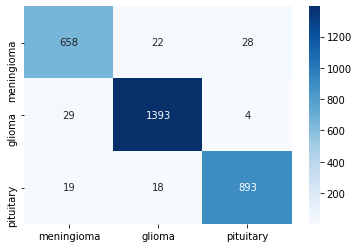

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.heatmap(confusion_matrix(tot_ans,tot_pre),annot=True,cmap='Blues', fmt='g',xticklabels=['meningioma', 'glioma','pituitary' ],yticklabels=['meningioma', 'glioma','pituitary' ])
plt.savefig('densenet_roc.png')

In [25]:

history={}
history['fold1']=np.load('history_all_fold_1_densenet_145.npy',allow_pickle=True).item()
history['fold2']=np.load('history_all_fold_2_densenet_145.npy',allow_pickle=True).item()
history['fold3']=np.load('history_all_fold_3_densenet_145.npy',allow_pickle=True).item()
history['fold4']=np.load('history_all_fold_4_densenet_145.npy',allow_pickle=True).item()
history['fold5']=np.load('history_all_fold_5_densenet_145.npy',allow_pickle=True).item()



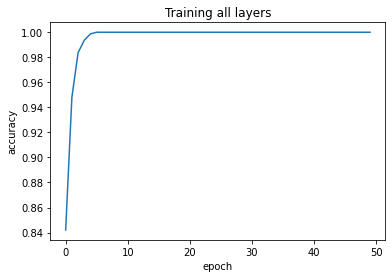

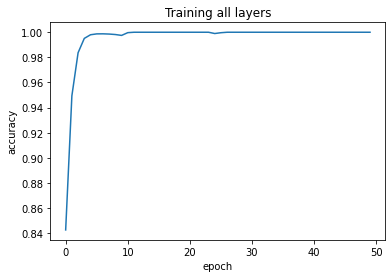

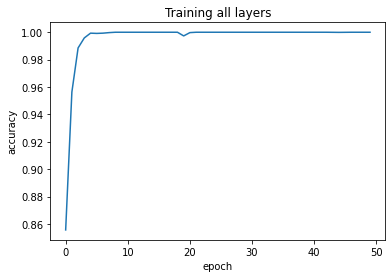

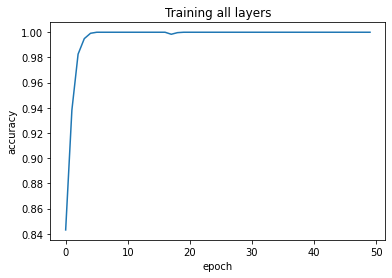

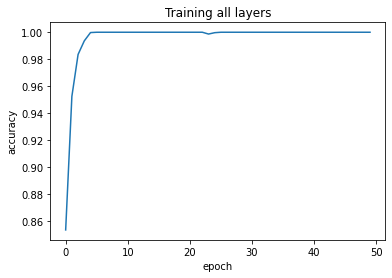

In [26]:
from matplotlib import pyplot as plt
for i in range(5):
    fold='fold'+str(i+1)
    fold1='fold_'+str(i+1)
    plt.plot(history[fold][fold1]['accuracy'])
    plt.title('loss for fold '+str(i))
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Training all layers')
    plt.show()

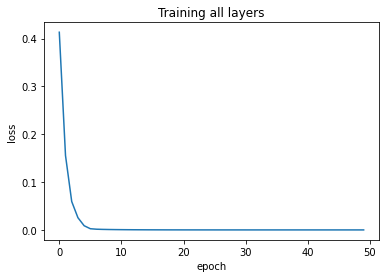

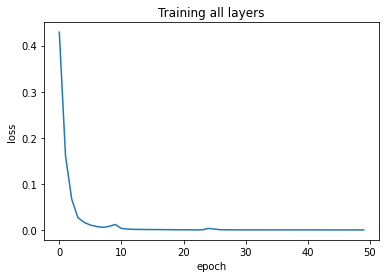

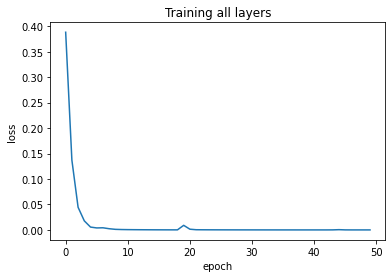

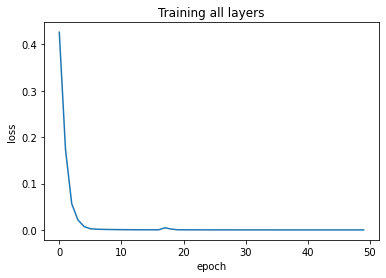

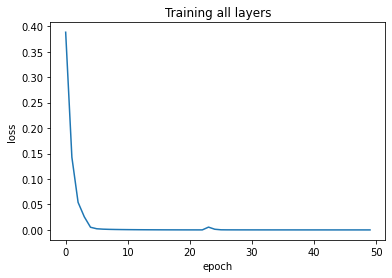

In [27]:
from matplotlib import pyplot as plt
for i in range(5):
    fold='fold'+str(i+1)
    fold1='fold_'+str(i+1)
    plt.plot(history[fold][fold1]['loss'])
    plt.title('loss for fold '+str(i))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Training all layers')
    plt.show()